# Individual Plan

github link: https://github.com/emily2628/Dsci-100---Individual-Plan.git

## 1. Importing Data

In [1]:
library(tidyverse)
url_players = 'https://drive.google.com/uc?export=download&id=18bYRGtsZOOfM_ZjaapVSedO5kAcqHBNC'
players <- read_csv(url_players)
head(players)

url_sessions = 'https://drive.google.com/uc?export=download&id=1r8jujQRJHYl_B8lU3Mj5ygTgCJHvNrIo'
sessions <- read_csv(url_sessions)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 2. Data Description
The dataset records information about minecraft players and their activity on the research server.  
Below are summaries of key variables, including the number of unique categories and basic statistics that describe the range of the numeric data.  
All values are rounded to two decimals where applicable.

### 2.1 Players Table

In [2]:
# distinct values for main categorical variables

distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


In [3]:
# quick range of numeric variables 

players |> summarise(max(played_hours), min(played_hours), mean = round(mean(played_hours, na.rm = TRUE), 2), 
                     max(Age), min(Age), mean = round(mean(Age, na.rm = TRUE), 2))

max(played_hours),min(played_hours),mean,max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,21.14,NA,NA


### 2.2 Summary of the `Players` Table  
There are 196 observations and 7 variables:  
- `experience` - character; player experience level (`Beginner`, `Regular`, `Amateur`, `Veteran`, `Pro`,)  
- `subscribe` - logical; whether the player subscribed (`TRUE` or `FALSE`)  
- `gender` - character; self indentified gender  
- `hashed_email` - character; anonymized email for privacy  
- `played_hours` - numeric; total play time in hours (range 0-99)  
- `age` - numeric; player's age (approx. 17-99)  
- `player_id` - character; unique player identifier  

### 2.3 Potential Issues
1. `experience` is a categorical variable and will need encoding if used in numerical models.   
2. Some gender categories have very few players, making comparisons between groups less reliable.   

### 2.4 Sessions Table

In [4]:
# distinct values for main categorical variables

distinct(sessions, hashedEmail)

hashedEmail
<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f
f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe


In [5]:
# quick range of numeric variables 

sessions |> 
    summarise(
        latest_start_time = max(start_time, na.rm = TRUE), 
        earliest_start_time = min(start_time, na.rm = TRUE), 
        latest_end_time = max(end_time, na.rm = TRUE), 
        earliest_end_time = min(end_time, na.rm = TRUE),
        latest_original_start = max(original_start_time, na.rm = TRUE), 
        earliest_original_start = min(original_start_time, na.rm = TRUE),
        latest_original_end = max(original_end_time, na.rm = TRUE), 
        earliest_original_end = min(original_end_time, na.rm = TRUE), 
    )

latest_start_time,earliest_start_time,latest_end_time,earliest_end_time,latest_original_start,earliest_original_start,latest_original_end,earliest_original_end
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
31/08/2024 23:35,01/05/2024 00:58,31/08/2024 23:20,01/05/2024 01:24,1.72733e+12,1.7124e+12,1.72734e+12,1.7124e+12


### 2.5 Summary of the `Sessions` Table
There are 1535 observations and 5 variables, the variables are:    
- `hashedEmail` - anonymized player ID used to link to `players`   
- `start_time` - processed session start time  
- `end_time` - processed session end time  
- `original_start_time` - unadjusted start time  
- `original_end_time` - unadjusted end time   

### 2.6 Potential Issues
1. The presence of both processed and original timestamps suggests possible time zone or clock adjustments, which may affect how session durations are interpreted 
2. Some sessions appear unusually long, possibly due to inactive sessions or missing logout records, which could distort average playtime calculations.

## 3. Questions
### 3.1 Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between various player types 

### 3.2 Specific Question 
Can player engagement variable such as total playtime, experience level, and number of interactions help predict whether a player subscribes to the game related newsletter?

### 3.3 How the Data Will Help 
The `players` table provides subscription status and key characteristics such as played_hours, experience, and age. These variables will help determine whether more engaged or experienced players are more likely to subscribe. 

### 3.4 To prepare the data, I plan to:
1. Use the `players` table as the main dataset
2. Select `subscribe` as the response and use predictions like `played_hours`, `experience`, `age`, plus optional session based features.
3. Join `sessions` and `players` using `hashedEmail` if additional activity metrics are needed.
4. Encode categorical variables (e.g., `experience`) and represent `subscribe` as binary outcome.
5. Check for and address missing values or outliers that may impact the model. 

## 4. Exploratory Data Analysis and Visualization

### 4.1 Mean Values of Quantitative Variables

In [6]:
# compute mean values for quantitative variables

players |>
    summarise(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2), 
        mean_Age = round(mean(Age, na.rm = TRUE), 2)
    )

mean_played_hours,mean_Age
<dbl>,<dbl>
5.85,21.14


#### Explanation: 

The average total playtime and age represent a "typical" player, helping show how far other values fall from the center.  

### 4.2 Total Playtime by Subscription Status

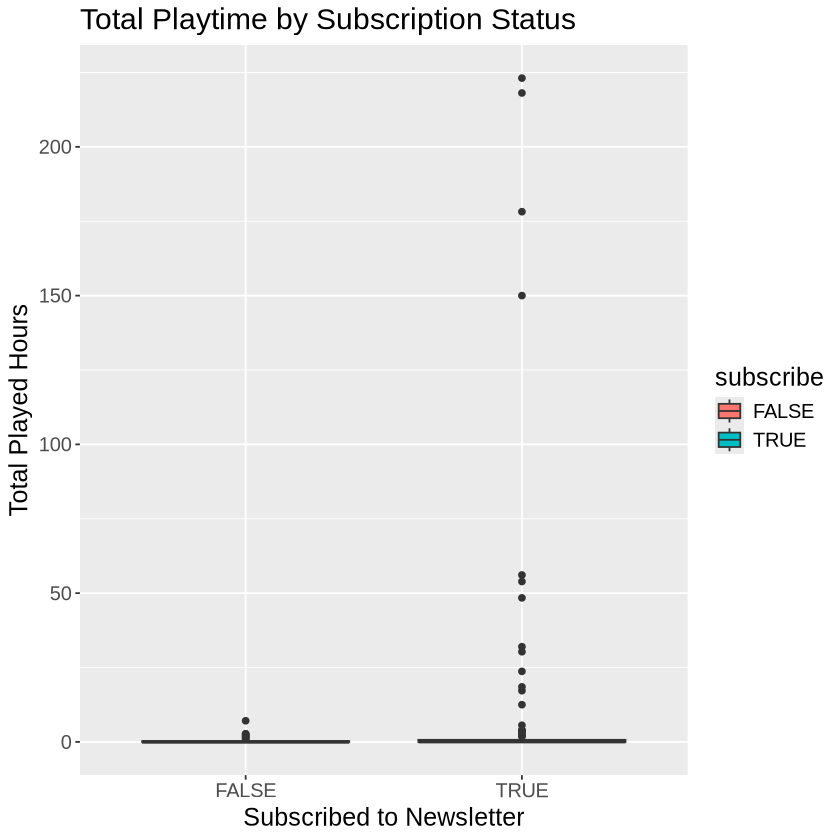

In [7]:
# playtime vs subscription

ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
    geom_boxplot() +
    labs(
        title = "Total Playtime by Subscription Status",
        x = "Subscribed to Newsletter",
        y = "Total Played Hours"
    ) +
    theme(text = element_text(size = 15))

#### Interpretation:

Subscribed players show slightly higher total playtime, but the groups overlap. This suggests total playtime alone does not strongly predict subscription.   

### 4.3 Proportion of Subscribers by Experience Level

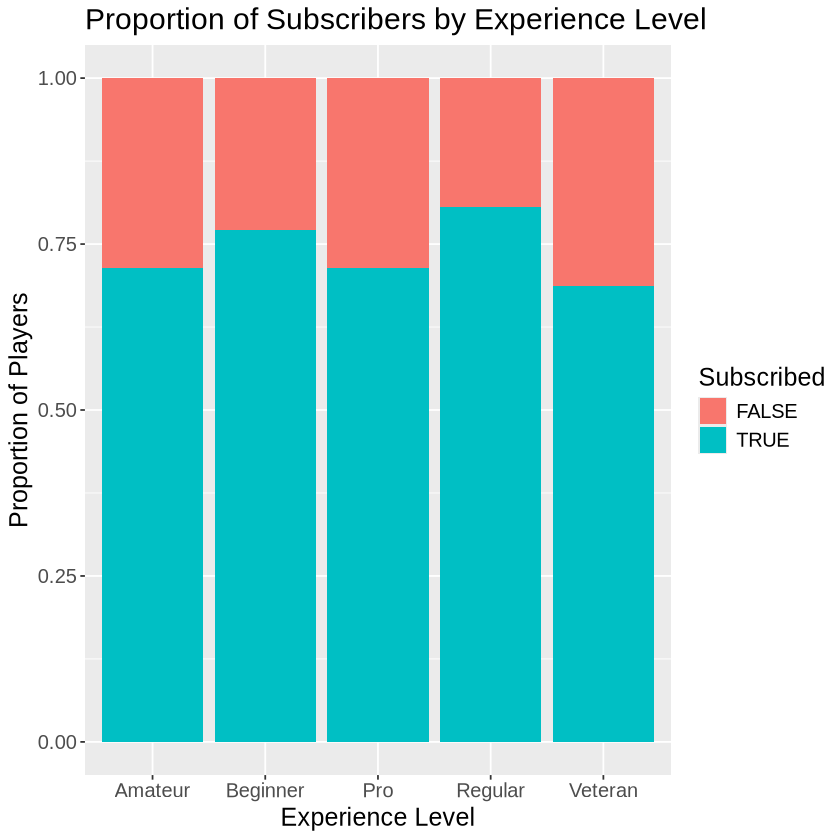

In [8]:
# experience level vs subscription

ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(
        title = "Proportion of Subscribers by Experience Level",
        x = "Experience Level",
        y = "Proportion of Players",
        fill = "Subscribed"
    ) +
    theme(text = element_text(size = 15))

#### Interpretation:

Contrary to expectations, **Regular players** have the highest subscription rate, while **Veteran** have the lowest. This suggests mid level players may be the most engaged or interested in staying connected, whereas highly experienced players may feel less need for updates.   

### 4.4 Playtime vs Age by Subscription Status

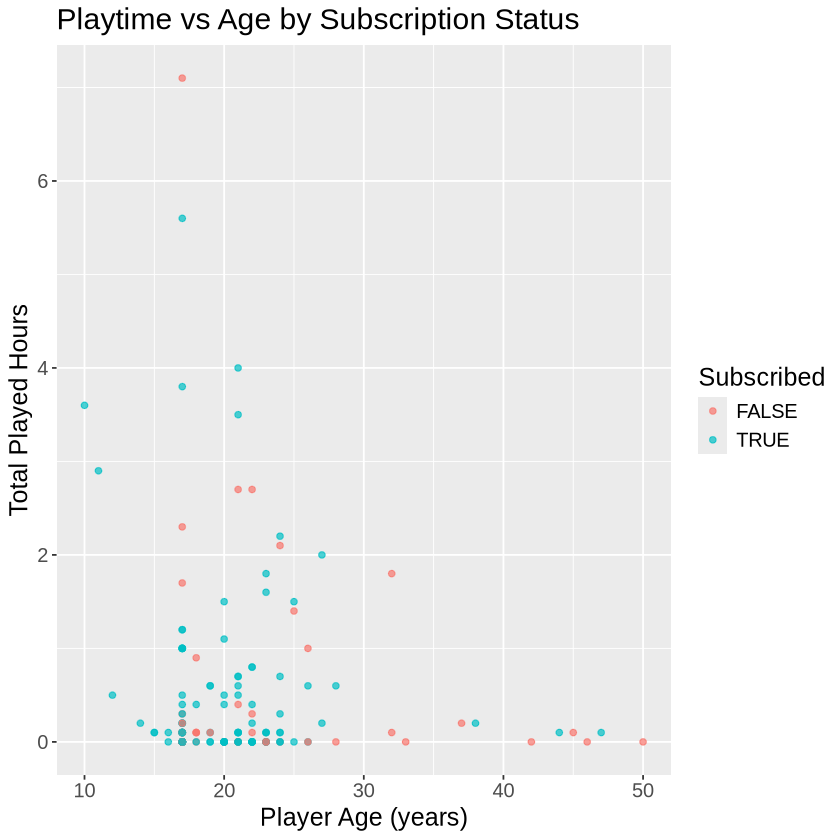

In [9]:
# playtime vs age

players |> 
    filter(played_hours <= 10 & Age <= 50) |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.7) +
    labs(
        title = "Playtime vs Age by Subscription Status",
        x = "Player Age (years)",
        y = "Total Played Hours",
        colour = "Subscribed"
    ) +
    theme(text = element_text(size = 15))

#### Interpretation:  

There is no clear pattern between age and playtime, though some younger players show higher playtime. Both subscribed and non-subscribed players appear at all ages, suggesting age is not a strong predictor of subscription.   

### 4.5 Average Playtime by Experience Level

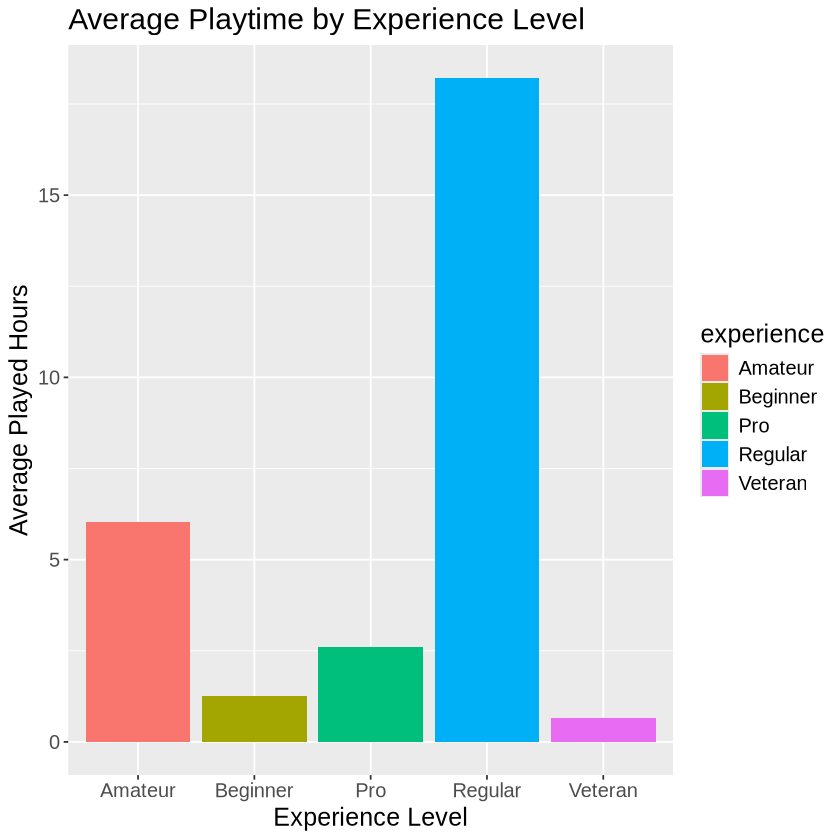

In [10]:
# average playtime by experience

players |>
    group_by(experience) |>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2)) |>
    ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_col() +
    labs(
        title = "Average Playtime by Experience Level",
        x = "Experience Level",
        y = "Average Played Hours"
    ) +
    theme(text = element_text(size = 15))

#### Interpretation: 

The bar chart shows that **Regular players** have the highest average playtime, suggesting they are the most consistenly engaged group. **Veteran players**, despite their experience, have lower current playtime, which may indicate they were highly active in the past but are now less engaged.   

## 5. Methods and Plan
I will answer **question 1**: What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between various player types?

I plan to use the **k-nearest neighbours (k-NN)** classification method to predict whether a player subscribes to the newsletter (`subscribe`) based on their level of enegagement and characteristics such as `played_hours`, `experience`, and `age`.

### 5.1 Why This Method is Appropriate 
k-NN is suitable because the response is **categorical**, and the method is **simple**, **non-parametric**, and does not require linear relationships.

### 5.2 Assumptions
k-NN assumes that similar players have similar outcomes and that predictors are on comparable scales. Numeric variables will be standardized to meet ths.

### 5.3 Potential Limitations
k-NN is sensitive to **outliers**, **irrelevant predictors**, and can be slower on large datasets. Performance depends on choosing an appropriate **k**.

### 5.4 Model Comparison and Selection
I will use **cross validation** to compare different k values and select the one with the **highest validation accuracy**. 

### 5.5 Data Processing Plan
After cleaning and encoding, the data will be split into **75% training** and **25% testing**. Numeric predictors will be standardized and categorical predictors encoded. Cross validation on the training set will tune **k**, and the final model will be evaluated on the test set. 
